In [19]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import sklearn.preprocessing as skpreprocess
import sklearn.linear_model as sklinear

Populating the interactive namespace from numpy and matplotlib


In [20]:
titanic = pd.DataFrame.from_csv("train_processed.csv")

feature_names = ["Pclass","Age","SibSp","Parch","Fare","IsMale","EmbarkC","EmbarkQ","EmbarkS"]
Xtrain = titanic[feature_names]
ytrain = titanic["Survived"]

In [21]:
scaler = skpreprocess.StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)

In [22]:
lrcv = sklinear.LogisticRegressionCV(Cs=30,cv=10)
lrcv.fit(Xtrain_scaled,ytrain)
lrcv.score(Xtrain_scaled,ytrain)

0.81481481481481477

In [23]:
lrcv.C_

array([ 0.00853168])

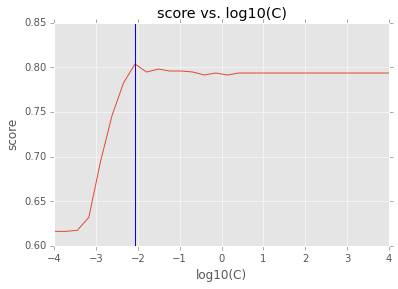

In [24]:
scores = np.asarray( lrcv.scores_[1] )
average_scores = scores.mean(axis=0)

plt.plot(np.log10(lrcv.Cs_),average_scores)
plt.axvline(np.log10(lrcv.C_))

plt.title("score vs. log10(C)")
plt.xlabel("log10(C)")
plt.ylabel("score")

In [25]:
def pretty_print_coef(coefs, names=None, sort=False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)     for coef, name in lst)

pretty_print_coef(lrcv.coef_.ravel(),feature_names,True)

'-0.689 * IsMale + -0.388 * Pclass + -0.166 * Age + 0.159 * Fare + -0.119 * SibSp + 0.082 * EmbarkC + -0.081 * EmbarkS + 0.015 * EmbarkQ + 0.005 * Parch'

In [26]:
titanic_test = pd.DataFrame.from_csv("test_processed.csv")
Xtest = titanic_test[feature_names]
Xtest_scaled = scaler.transform(Xtest)

In [27]:
predictions = lrcv.predict(Xtest_scaled)
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv("submit_lr.csv", index=False)